In [57]:
import pandas as pd
import numpy as np

In [58]:
column_names = ['id_number', 'psa_level', 'cancer_volume', 'weight', 'age', 
                'benign_prostatic_hyperplasia', 'seminal_vesicle_invasion', 
                'capsular_penetration', 'gleason_score']
num_vars = ['cancer_volume', 'weight', 'age', 
            'benign_prostatic_hyperplasia',  
            'capsular_penetration', 'gleason_score']
cat_vars = ['seminal_vesicle_invasion']

In [59]:
data = pd.read_csv('../resources/assignment3_1_cpy.txt', sep = ',', header = None, names = column_names)

In [60]:
data_rescaled[['psa_level', 'cancer_volume', 'weight', 'age', 'benign_prostatic_hyperplasia', 'seminal_vesicle_invasion', 'capsular_penetration', 'gleason_score']].describe()

,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
count,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000,9.700000e+01,9.700000e+01
mean,23.730134,-1.373472e-17,-1.422116e-16,3.960177e-16,-5.894483e-17,0.216495,-9.156479e-18,-6.066167e-16
std,40.782925,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.413995,1.000000e+00,1.000000e+00
min,0.651000,-8.551700e-01,-7.612804e-01,-3.071272e+00,-8.362184e-01,0.000000,-5.934898e-01,-1.184784e+00
25%,5.641000,-6.767506e-01,-3.527041e-01,-5.192637e-01,-8.362184e-01,0.000000,-5.934898e-01,-1.184784e+00
50%,13.330000,-3.471169e-01,-1.783908e-01,1.523174e-01,-3.908796e-01,0.000000,-4.747319e-01,1.672636e-01
75%,21.328000,1.797032e-01,6.416444e-02,5.552660e-01,7.337335e-01,0.000000,2.667051e-01,1.672636e-01
max,265.072000,4.898637e+00,8.857831e+00,2.032744e+00,2.554512e+00,1.000000,4.210243e+00,1.519311e+00


In [9]:
data.corr()

,id_number,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
id_number,1.000000,0.602684,0.620998,0.113741,0.196556,0.165005,0.566780,0.476752,0.537924
psa_level,0.602684,1.000000,0.624151,0.026213,0.017199,-0.016486,0.528619,0.550793,0.429580
cancer_volume,0.620998,0.624151,1.000000,0.005107,0.039094,-0.133209,0.581742,0.692897,0.481438
weight,0.113741,0.026213,0.005107,1.000000,0.164324,0.321849,-0.002410,0.001579,-0.024207
age,0.196556,0.017199,0.039094,0.164324,1.000000,0.366341,0.117658,0.099555,0.225852
benign_prostatic_hyperplasia,0.165005,-0.016486,-0.133209,0.321849,0.366341,1.000000,-0.119553,-0.083009,0.026826
seminal_vesicle_invasion,0.566780,0.528619,0.581742,-0.002410,0.117658,-0.119553,1.000000,0.680284,0.428573
capsular_penetration,0.476752,0.550793,0.692897,0.001579,0.099555,-0.083009,0.680284,1.000000,0.461566
gleason_score,0.537924,0.429580,0.481438,-0.024207,0.225852,0.026826,0.428573,0.461566,1.000000


In [10]:
data

,id_number,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
0,1,0.651,0.5599,15.959,50,0.0000,0,0.0000,6
1,2,0.852,0.3716,27.660,58,0.0000,0,0.0000,7
2,3,0.852,0.6005,14.732,74,0.0000,0,0.0000,7
3,4,0.852,0.3012,26.576,58,0.0000,0,0.0000,6
4,5,1.448,2.1170,30.877,62,0.0000,0,0.0000,6
5,6,2.160,0.3499,25.280,50,0.0000,0,0.0000,6
6,7,2.160,2.0959,32.137,64,1.8589,0,0.0000,6
7,8,2.340,1.9937,34.467,58,4.6646,0,0.0000,6
8,9,2.858,0.4584,34.467,47,0.0000,0,0.0000,7
9,10,2.858,1.2461,25.534,63,0.0000,0,0.0000,6


In [162]:
predictors = ['cancer_volume', 'weight', 'age', 
                'benign_prostatic_hyperplasia', 'seminal_vesicle_invasion', 
                'capsular_penetration', 'gleason_score']

In [163]:
response = ['psa_level']

### data preprocessing

In [7]:
data.iloc[0:5]

,id_number,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
0,1,0.651,0.5599,15.959,50,0.0,0,0.0,6
1,2,0.852,0.3716,27.660,58,0.0,0,0.0,7
2,3,0.852,0.6005,14.732,74,0.0,0,0.0,7
3,4,0.852,0.3012,26.576,58,0.0,0,0.0,6
4,5,1.448,2.1170,30.877,62,0.0,0,0.0,6


In [197]:
X = data[predictors]

In [198]:
X = X.values

In [65]:
X_cat = data[cat_vars]

In [66]:
X_num = data[num_vars]

In [67]:
X_cat = X_cat.values
X_num = X_num.values

In [69]:
y = data[response]

In [70]:
y = y.values

In [240]:
x_tst = np.array([4.2633, 22.783, 68, 1.3500, 0, 0, 6])

In [241]:
x_tst[0:6]

array([  4.2633,  22.783 ,  68.    ,   1.35  ,   0.    ,   0.    ])

### Build Models

#### Try Linear Regression

In [15]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
result = sm.OLS(y,X).fit()

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     18.96
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.50e-15
Time:                        23:19:39   Log-Likelihood:                -467.16
No. Observations:                  97   AIC:                             948.3
Df Residuals:                      90   BIC:                             966.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0549      0.588      3.496      0.001       0.887       3.222
x2             0.0091      0.073      0.124      0.902      -0.137       0.155
x3            -0.6362      0.394     -1.613      0.110      -1.420       0.147
x4             1.4053      1.162      1.209      0.230      -0.903       3.714
x5            20.2485     10.707      1.891      0.062      -1.023      41.520
x6             1.1540      1.319      0.875      0.384      -1.467       3.775
x7             5.6900      3.687      1.543      0.126      -1.634      13.014
==============================================================================
Omnibus:                       95.209   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.316
Skew:                           3.126   Prob(JB):                    5.47e-254
Kurtosis:                      18.795   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
predictions = result.get_prediction(x_tst)

In [19]:
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.739799,6.264748,-10.706216,14.185815,-61.128654,64.608252


#### Result is bad (Only 0.564 adjusted R-Square)

#### Try log(y) as output

In [42]:
import math

In [53]:
X = sm.add_constant(X)

In [44]:
y[:,0]

array([   0.651,    0.852,    0.852,    0.852,    1.448,    2.16 ,
          2.16 ,    2.34 ,    2.858,    2.858,    3.561,    3.561,
          3.561,    3.857,    4.055,    4.263,    4.349,    4.437,
          4.759,    4.953,    5.155,    5.259,    5.474,    5.529,
          5.641,    5.871,    6.05 ,    6.172,    6.36 ,    6.619,
          6.821,    7.463,    7.463,    7.538,    7.768,    8.085,
          8.671,    8.935,    9.116,    9.777,    9.974,   10.074,
         10.278,   10.697,   12.429,   12.807,   13.066,   13.066,
         13.33 ,   13.33 ,   14.296,   14.585,   14.585,   14.732,
         14.88 ,   15.18 ,   16.281,   16.281,   16.61 ,   16.61 ,
         17.116,   17.288,   17.288,   17.814,   17.814,   17.993,
         18.541,   19.298,   19.298,   19.492,   20.287,   20.905,
         21.328,   21.758,   26.576,   28.219,   29.666,   31.187,
         31.817,   33.448,   33.784,   34.124,   35.517,   35.517,
         36.234,   37.713,   39.646,   40.854,   53.517,   54.

In [45]:
y_log = [math.log(i) for i in y[:,0]]

In [54]:
result = sm.OLS(y_log,X).fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     18.24
Date:                Tue, 17 Apr 2018   Prob (F-statistic):           7.69e-15
Time:                        19:57:59   Log-Likelihood:                -107.84
No. Observations:                  97   AIC:                             231.7
Df Residuals:                      89   BIC:                             252.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6858      0.999     -0.687      0.494      -2.670       1.299
x1             0.0695      0.015      4.749      0.000       0.040       0.099
x2             0.0014      0.002      0.757      0.451      -0.002       0.005
x3            -0.0028      0.012     -0.239      0.812      -0.026       0.020
x4             0.0875      0.030      2.955      0.004       0.029       0.146
x5             0.7826      0.268      2.917      0.004       0.249       1.316
x6            -0.0265      0.033     -0.807      0.422      -0.092       0.039
x7             0.3582      0.128      2.799      0.006       0.104       0.612
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.821
Skew:                          -0.418   Prob(JB):                        0.244
Kurtosis:                       2.991   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X

array([[  1.00000000e+00,  -8.17014320e-01,  -6.46150891e-01,
         -1.86242597e+00,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,  -1.18478407e+00],
       [  1.00000000e+00,  -8.40907626e-01,  -3.90139812e-01,
         -7.87896192e-01,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,   1.67263633e-01],
       [  1.00000000e+00,  -8.11862604e-01,  -6.72996938e-01,
          1.36116337e+00,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,   1.67263633e-01],
       [  1.00000000e+00,  -8.49840651e-01,  -4.13857102e-01,
         -7.87896192e-01,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,  -1.18478407e+00],
       [  1.00000000e+00,  -6.19434576e-01,  -3.19753721e-01,
         -2.50631302e-01,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,  -1.18478407e+00],
       [  1.00000000e+00,  -8.43661129e-01,  -4.42212829e-01,
         -1.86242597e+00,  -8.36218358e-01,   0.00000000e+00,
         -5.93489781e-01,  -1.1

In [41]:
math.log(5)

1.6094379124341003

In [43]:
math.exp(math.log(5))

4.999999999999999

#### Try standardization for inputs

In [43]:
from sklearn import preprocessing

In [44]:
scaler = preprocessing.StandardScaler().fit(X)
scaler_y = preprocessing.StandardScaler().fit(y)

In [45]:
scaler.mean_

array([  1.        ,   6.99868247,  45.49136082,  63.86597938,
         2.53472474,   0.21649485,   2.24536701,   6.87628866])

In [46]:
x_scaled = scaler.transform(X)

In [47]:
x_scaled.mean(axis=0)

array([  0.00000000e+00,  -1.37347178e-17,   2.06020767e-16,
         4.13186095e-16,  -4.57823928e-17,  -3.66259142e-17,
        -4.57823928e-17,  -6.36375259e-16])

In [82]:
y_scaled = scaler_y.transform(y)

In [98]:
result_after_rescale = sm.OLS(y,X[:,[1,2,3,6]]).fit()

In [97]:
X[:,[1,2,3,6]]

array([[  1.59590000e+01,   5.00000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  2.76600000e+01,   5.80000000e+01,   0.00000000e+00,
          7.00000000e+00],
       [  1.47320000e+01,   7.40000000e+01,   0.00000000e+00,
          7.00000000e+00],
       [  2.65760000e+01,   5.80000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  3.08770000e+01,   6.20000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  2.52800000e+01,   5.00000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  3.21370000e+01,   6.40000000e+01,   1.85890000e+00,
          6.00000000e+00],
       [  3.44670000e+01,   5.80000000e+01,   4.66460000e+00,
          6.00000000e+00],
       [  3.44670000e+01,   4.70000000e+01,   0.00000000e+00,
          7.00000000e+00],
       [  2.55340000e+01,   6.30000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  3.65980000e+01,   6.50000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  3.65980000e

In [99]:
result_after_rescale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           2.70e-08
Time:                        00:45:40   Log-Likelihood:                -489.95
No. Observations:                  97   AIC:                             987.9
Df Residuals:                      93   BIC:                             998.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0370      0.091      0.406      0.686      -0.144       0.218
x2            -1.3729      0.473     -2.900      0.005      -2.313      -0.433
x3             0.4905      1.434      0.342      0.733      -2.358       3.339
x4            15.9017      4.225      3.764      0.000       7.512      24.291
==============================================================================
Omnibus:                      117.862   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2000.898
Skew:                           4.181   Prob(JB):                         0.00
Kurtosis:                      23.619   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
result_after_rescale.rsquared()

TypeError: 'numpy.float64' object is not callable

#### Try SVM

In [76]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

In [33]:
svm_clf = SVR(kernel = 'linear')

In [79]:
scoring = ['r2']

In [35]:
scores = cross_validate(svm_clf, X, y_log, cv=10, scoring = scoring, return_train_score=False)

In [36]:
scores

{'fit_time': array([ 0.19852424,  0.27666783,  0.13123393,  0.0447011 ,  0.21300673,
         0.16090918,  0.23928881,  0.14314771,  0.14613509,  0.128824  ]),
 'score_time': array([ 0.00078678,  0.00050306,  0.00039005,  0.00039792,  0.00039506,
         0.00117397,  0.000422  ,  0.0003531 ,  0.00038505,  0.00035501]),
 'test_r2': array([  -8.27380652,  -32.45164232,  -31.91460393, -352.35440854,
         -35.93352021, -180.35005012, -259.42996213,   -9.01793607,
        -187.27172035,   -2.43643959])}

#### Try random forest

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf_clf = RandomForestRegressor(oob_score=True)

#### RFECV

In [176]:
from sklearn.feature_selection import RFECV

In [177]:
rfe_rf = RFECV(estimator = rf_clf, step = 1, cv = 3, scoring = 'r2')

In [178]:
rfe_rf.fit(X,y)

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/ensemble/forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/ensemble/forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/ensemble/forest.py:720: UserWarnin

RFECV(cv=3,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False),
   n_jobs=1, scoring='r2', step=1, verbose=0)

In [179]:
rfe_rf.grid_scores_

array([-22.43530899, -20.59137335, -18.08458691, -23.78854811,
       -18.32294291, -13.4050702 , -19.42198998])

In [180]:
sorted(zip(rfe_rf.ranking_, predictors, rfe_rf.support_))

[(1, 'age', True),
 (1, 'benign_prostatic_hyperplasia', True),
 (1, 'cancer_volume', True),
 (1, 'capsular_penetration', True),
 (1, 'seminal_vesicle_invasion', True),
 (1, 'weight', True),
 (2, 'gleason_score', False)]

In [182]:
rfe_rf.estimator_.oob_score_

0.17124294247799488

#### Grid search

In [183]:
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV

In [199]:
tuned_parameters = {"n_estimators": [25, 50, 100, 200, 400, 800, 1600],
                    "max_features": ["sqrt", "log2"]}

In [200]:
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=3, scoring='r2', n_jobs = 2)

In [201]:
clf.fit(X,y)

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyen

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xinsongdu/.pyen

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': [25, 50, 100, 200, 400, 800, 1600], 'max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [202]:
clf.best_params_

{'max_features': 'sqrt', 'n_estimators': 400}

#### model evaluation

In [203]:
rf_clf = RandomForestRegressor(n_estimators=400, max_features = 'sqrt', oob_score=True)

In [204]:
rf_clf.fit(X,y)

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [205]:
rf_clf.oob_score_

0.28222511625337965

In [206]:
rf_clf.score(X,y)

0.90472574489163338

In [195]:
#predictors.pop()

'gleason_score'

In [207]:
predictors

['cancer_volume',
 'weight',
 'age',
 'benign_prostatic_hyperplasia',
 'seminal_vesicle_invasion',
 'capsular_penetration']

In [222]:
yhat = rf_clf.predict(X)
SS_Residual = sum((y[:,0]-yhat)**2)
SS_Total = sum((y[:,0]-np.mean(y[:,0]))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [223]:
adjusted_r_squared

0.89837412788440907

In [221]:
y[:,0]

array([   0.651,    0.852,    0.852,    0.852,    1.448,    2.16 ,
          2.16 ,    2.34 ,    2.858,    2.858,    3.561,    3.561,
          3.561,    3.857,    4.055,    4.263,    4.349,    4.437,
          4.759,    4.953,    5.155,    5.259,    5.474,    5.529,
          5.641,    5.871,    6.05 ,    6.172,    6.36 ,    6.619,
          6.821,    7.463,    7.463,    7.538,    7.768,    8.085,
          8.671,    8.935,    9.116,    9.777,    9.974,   10.074,
         10.278,   10.697,   12.429,   12.807,   13.066,   13.066,
         13.33 ,   13.33 ,   14.296,   14.585,   14.585,   14.732,
         14.88 ,   15.18 ,   16.281,   16.281,   16.61 ,   16.61 ,
         17.116,   17.288,   17.288,   17.814,   17.814,   17.993,
         18.541,   19.298,   19.298,   19.492,   20.287,   20.905,
         21.328,   21.758,   26.576,   28.219,   29.666,   31.187,
         31.817,   33.448,   33.784,   34.124,   35.517,   35.517,
         36.234,   37.713,   39.646,   40.854,   53.517,   54.

In [208]:
sorted(zip(rf_clf.feature_importances_,predictors))

[(0.090514484543693194, 'age'),
 (0.094326441472253234, 'benign_prostatic_hyperplasia'),
 (0.098401402598290139, 'weight'),
 (0.099312601177703269, 'seminal_vesicle_invasion'),
 (0.24979840953311686, 'capsular_penetration'),
 (0.36764666067494312, 'cancer_volume')]

#### draw figure

In [211]:
FI = sorted(zip(map(lambda x: round(x, 4), rf_clf.feature_importances_), predictors), reverse=True)

In [212]:
FI_arr = np.array(FI)

In [210]:
import matplotlib.pyplot as plt
import matplotlib

In [213]:
features = FI_arr[:,1]

In [214]:
importances = FI_arr[:,0].astype(float)

In [215]:
indices = np.argsort(importances)

In [216]:
plt.title('Predictor Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.figure(figsize=(40,40))
fig = plt.figure(figsize=(8,6))

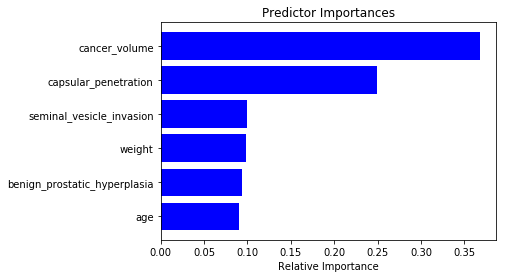

In [217]:
plt.show()
fig.savefig('temp.png', dpi=fig.dpi)
fig = plt.figure(figsize=(10, 5))

In [248]:
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
#    for x in range(len(X)):
    preds = []
    for pred in model.estimators_:
        preds.append(pred.predict(X)[0])
    err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
    err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [249]:
x_tst

array([[  4.2633,  22.783 ,  68.    ,   1.35  ,   0.    ,   0.    ]])

In [242]:
x_tst=x_tst[0:6]

In [243]:
x_tst=x_tst.reshape(1,6)

In [247]:
x_tst.reshape(-1,1)

array([[  4.2633],
       [ 22.783 ],
       [ 68.    ],
       [  1.35  ],
       [  0.    ],
       [  0.    ]])

In [245]:
rf_clf.estimators_[0].predict(x_tst[0:6])

array([ 3.857])

In [250]:
pred_ints(rf_clf,x_tst,90)

([3.8569999999999998], [14.295999999999999])

#### Try Gradient Boosting Regression

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gbdt_clf = GradientBoostingRegressor()

In [92]:
scores = cross_validate(gbdt_clf, X, y, cv=2, scoring = scoring, return_train_score=True)

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
scores

{'fit_time': array([ 0.03166103,  0.02115512]),
 'score_time': array([ 0.00131989,  0.00040197]),
 'test_r2': array([-18.09307872,  -0.38404535]),
 'train_r2': array([ 0.99971516,  0.99547953])}

#### Try decision tree

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dt_reg = DecisionTreeRegressor()

In [166]:
dt_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [173]:
from sklearn.tree import export_graphviz
export_graphviz(dt_reg, out_file='tree.dot', feature_names=predictors)

In [174]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

/bin/sh: dot: command not found


In [175]:
from IPython.display import Image
Image(filename='tree.png')

### Other tests

In [31]:
data_test = data.copy()

In [33]:
data_test[num_vars] = (data_test[num_vars] - data_test[num_vars].mean())/data_test[num_vars].std()

In [37]:
data_test[num_vars].mean()

cancer_volume                  -8.698655e-17
weight                         -1.241847e-16
age                             5.036063e-16
benign_prostatic_hyperplasia    3.605363e-17
capsular_penetration           -2.655379e-16
gleason_score                  -5.081846e-16
dtype: float64

In [38]:
data_rescaled = data_test.copy()

In [39]:
data_rescaled

,id_number,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
0,1,0.651,-0.817014,-0.646151,-1.862426,-0.836218,0,-0.593490,-1.184784
1,2,0.852,-0.840908,-0.390140,-0.787896,-0.836218,0,-0.593490,0.167264
2,3,0.852,-0.811863,-0.672997,1.361163,-0.836218,0,-0.593490,0.167264
3,4,0.852,-0.849841,-0.413857,-0.787896,-0.836218,0,-0.593490,-1.184784
4,5,1.448,-0.619435,-0.319754,-0.250631,-0.836218,0,-0.593490,-1.184784
5,6,2.160,-0.843661,-0.442213,-1.862426,-0.836218,0,-0.593490,-1.184784
6,7,2.160,-0.622112,-0.292186,0.018001,-0.222958,0,-0.593490,-1.184784
7,8,2.340,-0.635080,-0.241207,-0.787896,0.702656,0,-0.593490,-1.184784
8,9,2.858,-0.829894,-0.241207,-2.265375,-0.836218,0,-0.593490,0.167264
9,10,2.858,-0.729943,-0.436655,-0.116315,-0.836218,0,-0.593490,-1.184784
